## Logistic Regression Challenge

In [1]:
#import the required packages here
import pandas as pd
import numpy as np

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [2]:
X = pd.read_csv("Smartphone Sensor Data/train/X_train_clean.txt", header=None, sep=" ")

In [3]:
y = pd.read_csv("Smartphone Sensor Data/train/y_train.txt", header=None, sep="\n")
y = y.iloc[:,0]  # convert dataframe to series

In [4]:
X.drop(labels=0, axis=1, inplace=True)

In [5]:
X

,1,2,3,4,5,6,7,8,9,10,...,552,553,554,555,556,557,558,559,560,561
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [6]:
y

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [7]:
def make_binary(y):
    return np.array([0 if num in [1,2,3] else 1 for num in y])

In [8]:
y_bin = make_binary(y)

> 1 is walking 0 is not walking

### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Select features

In [10]:
X1 = X.loc[:,54]
X1 = X1.to_numpy().reshape(-1,1)

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_bin, train_size=0.8)

#### Train model

In [12]:
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
pred1 = model1.predict(X1_test)

#### Evaluate model

In [13]:
model1.score(X1_test, y1_test)

0.7579877634262406

In [14]:
confusion_matrix(y1_test, pred1)

array([[532, 116],
       [240, 583]])

#### plot relationship between feature 54 and walk probability

In [15]:
walk_proba = model1.predict_proba(X1_test)[:,1]

In [16]:
df1 = pd.DataFrame({"tGravAccY": X1_test.reshape(-1), "Walk Probability": walk_proba})

In [17]:
df1.sort_values("tGravAccY", inplace=True)

In [18]:
from matplotlib import pyplot as plt

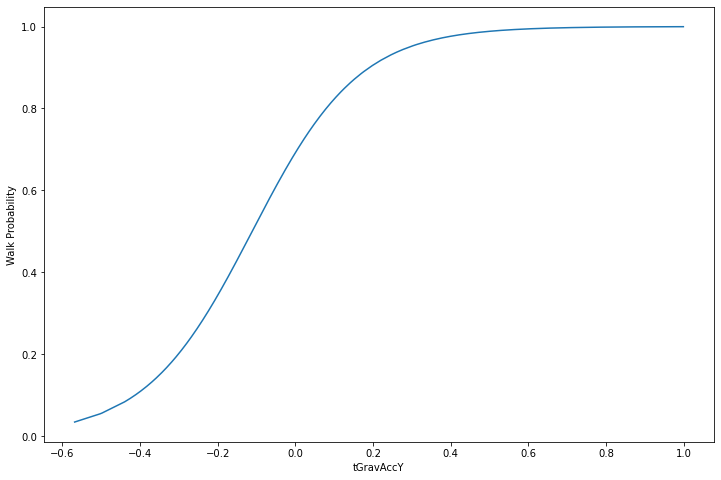

In [19]:
fig = plt.figure(figsize=(12,8))
plt.plot(df1["tGravAccY"], df1["Walk Probability"])

plt.xlabel("tGravAccY")
plt.ylabel("Walk Probability")

plt.show()

### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [20]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y_bin)
model4 = LogisticRegression()
model4.fit(X4_train, y4_train)
pred4 = model4.predict(X4_test)

In [21]:
model4.score(X4_test, y4_test)

1.0

In [22]:
confusion_matrix(y4_test, pred4)

array([[ 829,    0],
       [   0, 1009]])

> wow, perfect result

#### testing feature importance

In [77]:
model4.coef_.shape

(1, 561)

In [23]:
coefs = model4.coef_.flatten()
coef_df = pd.DataFrame(enumerate(coefs, start=1), columns=["Feature", "Coef"])

In [24]:
coef_df = abs(coef_df)

In [48]:
# top 40 weighted features
top_40 = coef_df.sort_values("Coef", ascending=False).head(40)

In [50]:
top_40.Feature.values

array([ 64,  10, 367, 103,  57, 288, 515, 160,  53, 514, 235, 105, 370,
       272, 269,  51, 368,  41, 104,   4,  23,  42, 141, 458,   7, 183,
       457, 185, 159, 275, 511, 369, 266, 289,  58, 559, 294, 290,  93,
       524])

### Multiplying the coeficients by their standard deviation to get a better feel

In [97]:
# scale coeficients
top_feats_scaled = pd.DataFrame(np.std(X)*np.abs(model4.coef_.flatten())).sort_values(0, ascending=False)

In [99]:
top_feats_scaled.head(40).index.values

array([367, 288,  10,  57, 103, 235, 368, 105, 104,  53,  64, 511, 289,
       369,  79, 524, 185, 160,  41, 183, 290, 272, 269,  23,   4, 559,
       261, 515,   7, 514, 209, 222,  51, 275, 266,  58,  50, 448, 370,
        42])

### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

In [45]:
from sklearn.metrics.cluster import contingency_matrix

In [26]:
# selecting only fetures 4, 19, and 54
X5 = X[[4,19,54]]

In [33]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y)

In [38]:
# model using only feature 4
model5 = LogisticRegression()
model5.fit(X5_train[4].to_numpy().reshape(-1,1), y5_train)
pred5 = model5.predict(X5_test[4].to_numpy().reshape(-1,1))

In [40]:
# using only feature 19
model7 = LogisticRegression()
model7.fit(X5_train[19].to_numpy().reshape(-1,1), y5_train)
pred7 = model7.predict(X5_test[19].to_numpy().reshape(-1,1))

In [39]:
# using only feature 54
model6 = LogisticRegression()
model6.fit(X5_train[54].to_numpy().reshape(-1,1), y5_train)
pred6 = model6.predict(X5_test[54].to_numpy().reshape(-1,1))

In [42]:
model5.score(X5_test[4].to_numpy().reshape(-1,1), y5_test)

0.5261153427638737

In [87]:
contingency_matrix(X5_test[4].to_numpy().reshape(-1,1), y5_test)

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [63]:
model6.score(X5_test[19].to_numpy().reshape(-1,1), y5_test)

0.1485310119695321

In [64]:
contingency_matrix(X5_test[19].to_numpy().reshape(-1,1), y5_test)

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [91]:
print(classification_report(y5_test, pred5))

              precision    recall  f1-score   support

           1       0.60      0.85      0.70       308
           2       0.54      0.21      0.30       281
           3       0.71      0.85      0.77       237
           4       0.00      0.00      0.00       332
           5       0.41      0.76      0.54       355
           6       0.49      0.54      0.51       325

    accuracy                           0.53      1838
   macro avg       0.46      0.53      0.47      1838
weighted avg       0.44      0.53      0.46      1838



/Users/zacharyargentin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zacharyargentin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zacharyargentin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [65]:
model5.score(X5_test[54].to_numpy().reshape(-1,1), y5_test)

0.10772578890097932

In [66]:
contingency_matrix(X5_test[54].to_numpy().reshape(-1,1), y5_test)

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

In [54]:
X8 = X[top_40.Feature.values]

In [55]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y)

In [60]:
model8 = LogisticRegression(max_iter=1000)
model8.fit(X8_train, y8_train)
pred8 = model8.predict(X8_test)

In [61]:
model8.score(X8_test, y8_test)

0.9499455930359086

In [68]:
confusion_matrix(y8_test, pred8)

array([[304,   9,   2,   0,   0,   0],
       [ 10, 263,   4,   0,   0,   0],
       [  2,   6, 213,   0,   0,   0],
       [  0,   0,   0, 287,  33,   1],
       [  0,   0,   0,  23, 315,   0],
       [  0,   2,   0,   0,   0, 364]])

In [88]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y8_test, pred8))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96       315
           2       0.94      0.95      0.94       277
           3       0.97      0.96      0.97       221
           4       0.93      0.89      0.91       321
           5       0.91      0.93      0.92       338
           6       1.00      0.99      1.00       366

    accuracy                           0.95      1838
   macro avg       0.95      0.95      0.95      1838
weighted avg       0.95      0.95      0.95      1838



In [100]:
X9 = X[top_feats_scaled.index.values]

In [101]:
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y)

In [103]:
model9 = LogisticRegression(max_iter=2000)
model9.fit(X9_train, y9_train)
pred9 = model9.predict(X9_test)

In [104]:
model9.score(X9_test, y9_test)

0.9869423286180631

In [105]:
confusion_matrix(y9_test, pred9)

array([[309,   0,   0,   0,   0,   0],
       [  0, 280,   0,   0,   0,   0],
       [  1,   1, 252,   0,   0,   0],
       [  0,   0,   0, 299,  15,   0],
       [  0,   0,   0,   7, 323,   0],
       [  0,   0,   0,   0,   0, 351]])

In [106]:
print(classification_report(y9_test, pred9))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       309
           2       1.00      1.00      1.00       280
           3       1.00      0.99      1.00       254
           4       0.98      0.95      0.96       314
           5       0.96      0.98      0.97       330
           6       1.00      1.00      1.00       351

    accuracy                           0.99      1838
   macro avg       0.99      0.99      0.99      1838
weighted avg       0.99      0.99      0.99      1838



# Conclusion

Looking at the weights of each feature scaled by the standard deviation of that feature gave a great look at which features were most important and allowed to reduce dimensionality by only selecting the best features and the result was pretty good! Better than looking at the coeficients without scaling

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.